In [1]:
import sys
sys.path

['/Users/gonakazawa/Documents/go/dev_environments/bayes_optimization',
 '/opt/homebrew/Cellar/python@3.10/3.10.8/Frameworks/Python.framework/Versions/3.10/lib/python310.zip',
 '/opt/homebrew/Cellar/python@3.10/3.10.8/Frameworks/Python.framework/Versions/3.10/lib/python3.10',
 '/opt/homebrew/Cellar/python@3.10/3.10.8/Frameworks/Python.framework/Versions/3.10/lib/python3.10/lib-dynload',
 '',
 '/opt/homebrew/Cellar/jupyterlab/3.4.8/libexec/lib/python3.10/site-packages',
 '/opt/homebrew/opt/six/lib/python3.10/site-packages',
 '/opt/homebrew/lib/python3.10/site-packages']

In [2]:
sys.path.append("/Users/gonakazawa/.pyenv/versions/3.10.6/lib/python3.10/site-packages")

In [3]:
!pip install scikit-learn

  Using cached scikit_learn-1.2.1-cp310-cp310-macosx_12_0_arm64.whl (8.4 MB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)

[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import datetime as dt
data = pd.DataFrame()

In [5]:
!ls

data                                    marodata_linear_reggression.ipynb
imgs                                    note01_regression.ipynb
maro_cagedata.csv                       note02_optimization.ipynb
maro_cagedataの元データ.csv             note03_experimental_design.ipynb
maro_data_2.csv                         note04_batchBO.ipynb
marodata_linear_reggression-Copy1.ipynb ベイズ最適化.pdf


In [6]:
maro = pd.read_csv('maro_data_2.csv')
maro

,Date,temperature,humidity
0,2023-01-20 01:43,21.0,74
1,2023-01-21 01:43,21.4,65
2,2023-01-22 01:43,20.2,71
3,2023-01-23 01:43,22.2,71
4,2023-01-24 01:43,22.6,71
5,2023-01-25 01:43,22.5,61
6,2023-01-26 01:43,22.4,64
7,2023-01-27 01:43,21.2,63
8,2023-01-28 01:43,23.3,60
9,2023-01-29 01:43,20.5,65


In [7]:
df = pd.DataFrame(maro)
df.head()

,Date,temperature,humidity
0,2023-01-20 01:43,21.0,74
1,2023-01-21 01:43,21.4,65
2,2023-01-22 01:43,20.2,71
3,2023-01-23 01:43,22.2,71
4,2023-01-24 01:43,22.6,71


In [8]:
df["year"] = df['Date'].str[:4]
df["month"] = df['Date'].str[5:7]
df["day"] = df['Date'].str[8:10]
df["time"] = df['Date'].str[11:13]
df

,Date,temperature,humidity,year,month,day,time
0,2023-01-20 01:43,21.0,74,2023,01,20,01
1,2023-01-21 01:43,21.4,65,2023,01,21,01
2,2023-01-22 01:43,20.2,71,2023,01,22,01
3,2023-01-23 01:43,22.2,71,2023,01,23,01
4,2023-01-24 01:43,22.6,71,2023,01,24,01
5,2023-01-25 01:43,22.5,61,2023,01,25,01
6,2023-01-26 01:43,22.4,64,2023,01,26,01
7,2023-01-27 01:43,21.2,63,2023,01,27,01
8,2023-01-28 01:43,23.3,60,2023,01,28,01
9,2023-01-29 01:43,20.5,65,2023,01,29,01


In [9]:
df["new_date"]=df['year'].str.cat(df['month'])
df["new_date"]=df['new_date'].str.cat(df['day'])
df["new_date"]=df['new_date'].str.cat(df['time'])
df["new_date"]=df['new_date'].astype(int)
df

,Date,temperature,humidity,year,month,day,time,new_date
0,2023-01-20 01:43,21.0,74,2023,01,20,01,2023012001
1,2023-01-21 01:43,21.4,65,2023,01,21,01,2023012101
2,2023-01-22 01:43,20.2,71,2023,01,22,01,2023012201
3,2023-01-23 01:43,22.2,71,2023,01,23,01,2023012301
4,2023-01-24 01:43,22.6,71,2023,01,24,01,2023012401
5,2023-01-25 01:43,22.5,61,2023,01,25,01,2023012501
6,2023-01-26 01:43,22.4,64,2023,01,26,01,2023012601
7,2023-01-27 01:43,21.2,63,2023,01,27,01,2023012701
8,2023-01-28 01:43,23.3,60,2023,01,28,01,2023012801
9,2023-01-29 01:43,20.5,65,2023,01,29,01,2023012901


In [25]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 13.7 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 21.0 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 12.6 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 8.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

X1 = maro[['new_date']].values         # 説明変数（Numpyの配列）
Y = maro[['temperature']].values         # 目的変数（Numpyの配列）

lr.fit(X1, Y)                        # 線形モデルの重みを学習

LinearRegression()

In [12]:
print('coefficient = ', lr.coef_[0]) # 説明変数の係数を出力
print('intercept = ', lr.intercept_) # 切片を出力

coefficient =  [0.00011094]
intercept =  [-224408.62053593]


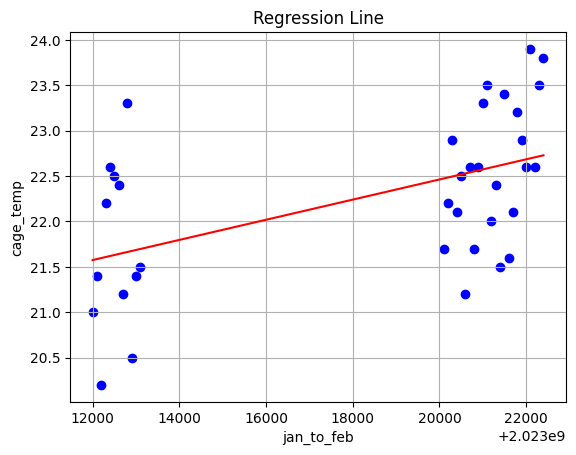

In [14]:
plt.scatter(X1, Y, color = 'blue')         # 説明変数と目的変数のデータ点の散布図をプロット
plt.plot(X1, lr.predict(X1), color = 'red') # 回帰直線をプロット

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('jan_to_feb') # x軸のラベル
plt.ylabel('cage_temp')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

(array([  5.,  14.,  31.,  61.,  89., 167., 212., 150., 104.,  40.]),
 array([18.8 , 19.34, 19.88, 20.42, 20.96, 21.5 , 22.04, 22.58, 23.12,
        23.66, 24.2 ]),
 <BarContainer object of 10 artists>)

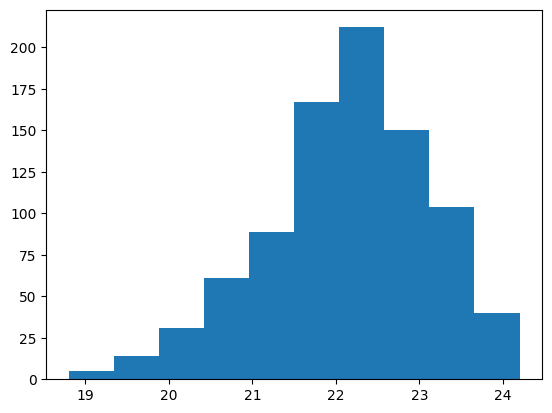

In [84]:
plt.hist(df['temperature'])

Scikit-learn で線形回帰
https://qiita.com/0NE_shoT_/items/08376b08783cd554b02e

【Python】日付型データから年・月・日を取り出す方法｜datetime
https://smart-hint.com/python/datetime-ymd/

pandasで文字列にスライスを適用して任意の位置・長さの部分を抽出
https://note.nkmk.me/python-pandas-str-combine/

pandas.DataFrameの複数の列の文字列を結合して新たな列を生成
https://note.nkmk.me/python-pandas-str-combine/